# Explore Trifeature Dataset

In [1]:
import numpy as np
import pandas as pd
import sys

sys.path.append("..")
from helpers import filename_for
from plotconf import *

Welcome to JupyROOT 6.18/04


In [2]:
files = [
    filename_for(15, 30, 600, 500, n, "inclxx", s, "trifeature.pkl") for n in [1, 2, 3, 4, 5, 6] for s in range(20)
]
dfs = [pd.read_pickle(file) for file in files]
data = pd.concat(dfs, ignore_index=True)
display(data)

,nPN,nPP,nPH,nHits,nClus,Edep
0,1,1,1,12,8,245
1,1,1,1,6,6,167
2,1,0,0,0,0,0
3,1,1,1,13,1,322
4,1,1,1,15,5,206
...,...,...,...,...,...,...
1199995,6,5,5,75,23,1286
1199996,6,6,6,64,41,995
1199997,6,6,6,62,24,1315
1199998,6,6,6,81,38,1376


In [3]:
r = range(1, 6)
hits = [np.histogram(data[data["nPH"] == n]["nHits"], range=(0, 150), bins=150, density=True)[0] for n in r]
clus = [np.histogram(data[data["nPH"] == n]["nClus"], range=(0, 150), bins=150, density=True)[0] for n in r]
edep = [np.histogram(data[data["nPH"] == n]["Edep"], range=(0, 2000), bins=200, density=True)[0] for n in r]

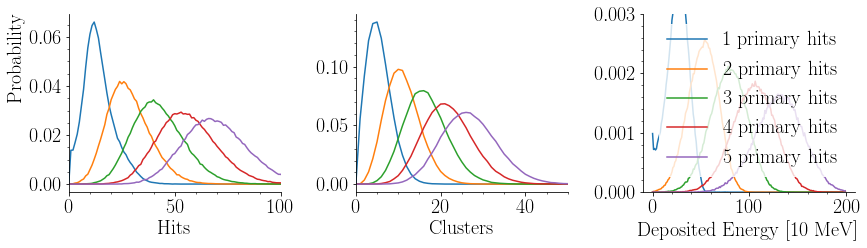

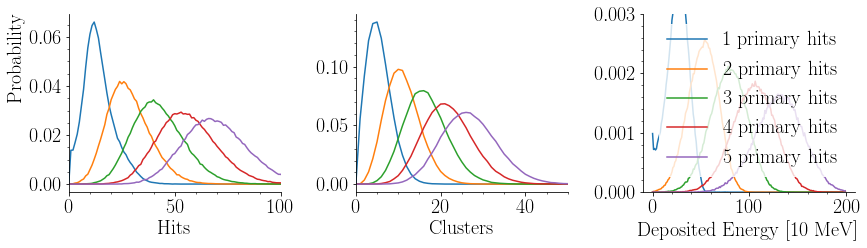

In [4]:
fig = plt.figure(figsize=(2 * 6.224, 2 * (6.224 / 1.618 * 0.5)))

ax1 = fig.add_subplot(131)
ax1.set_xlim(0, 100)
for h in hits:
    ax1.plot(h)
ax1.set_ylabel(r"Probability", horizontalalignment="right", y=1)
ax1.set_xlabel(r"Hits")

ax2 = fig.add_subplot(132)
ax2.set_xlim(0, 50)
for c in clus:
    ax2.plot(c)
ax2.set_xlabel(r"Clusters")

ax3 = fig.add_subplot(133)
ax3.set_ylim(0, 0.003)
for i, e in enumerate(edep, 1):
    ax3.plot(e, label=f"{i} primary hits")
ax3.set_xlabel(r"Deposited Energy [10 MeV]")

ax3.legend()

fig.tight_layout()

display(fig)

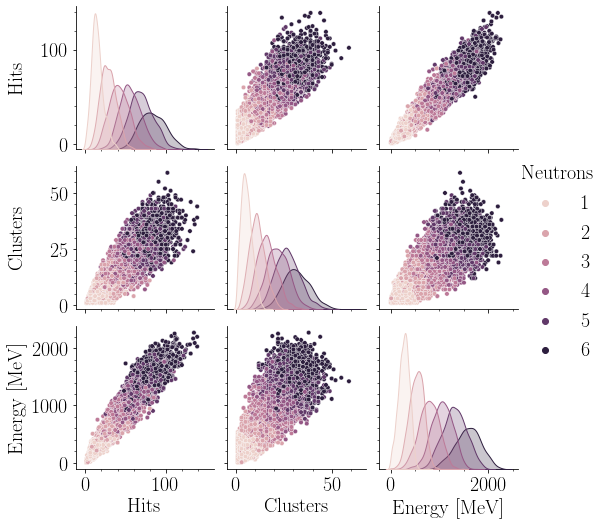

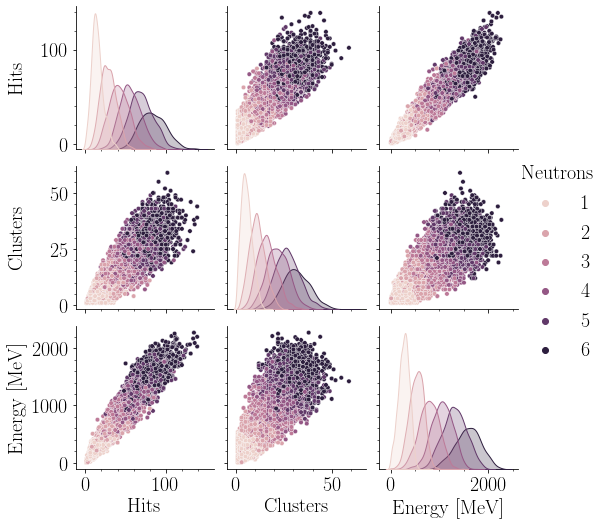

In [5]:
sample = data[data["nPH"] > 0].sample(frac=0.005)

g = sns.pairplot(sample, vars=["nHits", "nClus", "Edep"], hue="nPH", plot_kws={"s": 20})
for ax in g.axes[:,0]:
    ax.get_yaxis().set_label_coords(-0.35,0.5)
g.axes[2][0].set_xlabel("Hits")
g.axes[2][1].set_xlabel("Clusters")
g.axes[2][2].set_xlabel("Energy [MeV]")
g.axes[0][0].set_ylabel("Hits")
g.axes[1][0].set_ylabel("Clusters")
g.axes[2][0].set_ylabel("Energy [MeV]")
g._legend.set_title("Neutrons")

fig = g.fig
fig.savefig(f"results/pairplot_trifeature.pdf", bbox_inches="tight")

display(fig)

In [6]:
from sklearn.metrics import (
    balanced_accuracy_score,
    confusion_matrix,
    plot_confusion_matrix,
)

y_true = data["nPN"].values.ravel()
y_pred = data["nPH"].values.ravel()

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

bac = balanced_accuracy_score(y_true, y_pred)
print(bac)
cm = confusion_matrix(y_true, y_pred, labels=range(0, 5 + 1))
print(cm)
cmrel = confusion_matrix(y_true, y_pred, labels=range(0, 5 + 1), normalize="true")
print((cmrel * 100).round())

/home/jmayer/.pyenv/versions/3.8.5/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1814: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')


0.84356
[[     0      0      0      0      0      0]
 [  9894 190106      0      0      0      0]
 [   463  18949 180588      0      0      0]
 [    23   1415  26518 172044      0      0]
 [     1    102   2653  33707 163537      0]
 [     0      7    233   3989  39379 156392]]
[[ 0.  0.  0.  0.  0.  0.]
 [ 5. 95.  0.  0.  0.  0.]
 [ 0.  9. 90.  0.  0.  0.]
 [ 0.  1. 13. 86.  0.  0.]
 [ 0.  0.  1. 17. 82.  0.]
 [ 0.  0.  0.  2. 20. 78.]]


In [7]:
y_true = data["nPH"].values.ravel()
y_pred = data["nPH"].values.ravel()

np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

bac = balanced_accuracy_score(y_true, y_pred)
print(bac)
cm = confusion_matrix(y_true, y_pred, labels=range(0, 5 + 1))
print(cm)
cmrel = confusion_matrix(y_true, y_pred, labels=range(0, 5 + 1), normalize="true")
print((cmrel * 100).round())

1.0
[[ 10381      0      0      0      0      0]
 [     0 210579      0      0      0      0]
 [     0      0 210003      0      0      0]
 [     0      0      0 210156      0      0]
 [     0      0      0      0 208668      0]
 [     0      0      0      0      0 200608]]
[[100.   0.   0.   0.   0.   0.]
 [  0. 100.   0.   0.   0.   0.]
 [  0.   0. 100.   0.   0.   0.]
 [  0.   0.   0. 100.   0.   0.]
 [  0.   0.   0.   0. 100.   0.]
 [  0.   0.   0.   0.   0. 100.]]
